## Which Players have shown the most improvement/regression in Batting Average in the post season?  What percentage of players perform better/worse than their average in the playoffs?

#### Visualizing The Data

We were able to use Apache Spark to Extract the Data needed to answer our questions related to the Regular Season versus Post Season batting average. We can now visualize the data, so it is easier to see trends in it. We used Apache Spark to export data to pandas data frames, and csv files. We can now visualize these dataframes using matplotlib.  

In [229]:
# Import the necessary libraries to visualize a pandas data frame
# Read the raw data from csv files

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#### Extract Information we wish to Visualize
Our Dataframe contains a lot of information about the Top Spending Teams in Major League Baseball. However we only wish to visualize the Number of Wins each one of these teams obtained. We filter the data for the columns we wish to visualize.

In [230]:
# Read in the Data file that contains the Data we wish to visualize, and filter it for the columns that need visualization

df_raw = pd.read_csv('spark_question7_post_season_bat_diff.csv')

df = (df_raw.filter(items=['DIFF']))
df = df.rename(index=str, columns={"DIFF": "Post Season to Regular Season Batting Average Difference"})


#### Histogram Chart showing difference in Batting Average between regular season and post season
Our pandas dataframe contains Information about the difference in player batter average between the post season and the regular season. We then use matplotlib to plot a Histogram chart, with a diverging color map, to show what percentage of players exceed their regular season average. The plot shows that most players perform slightly worse than their regular season average. If we measure this as a percentage, only roughly about 29% of players perform better than in the post season, than in the regular season. So approximately 71% of players perform worse in the post season, than they do in the regular season. 

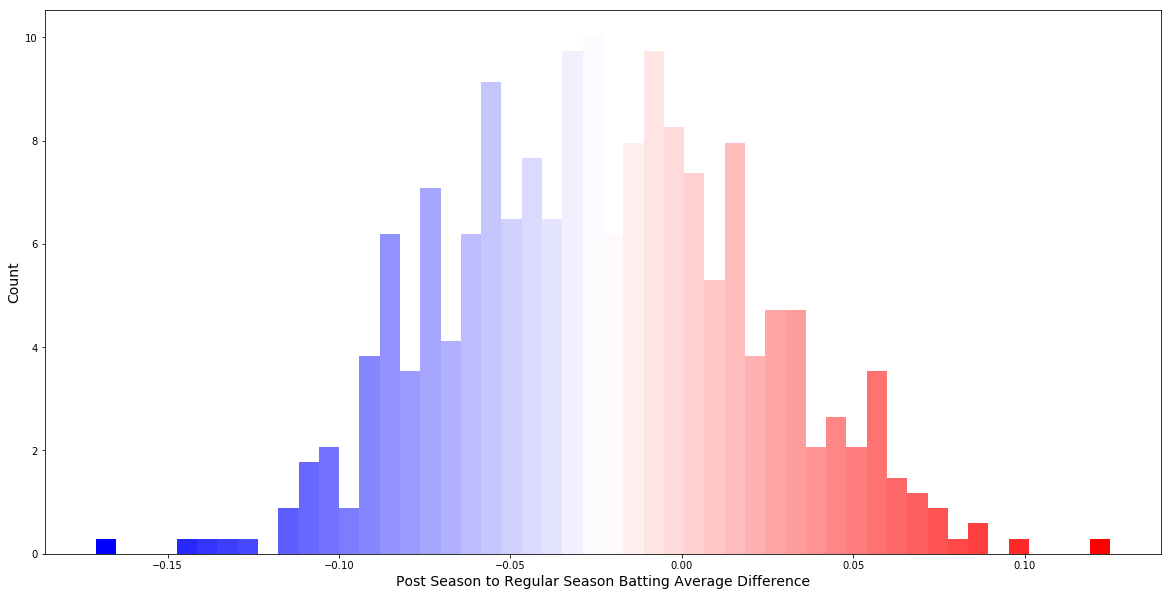

In [232]:
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('bwr')
    
plt.figure(figsize=(20,10))
# Plot histogram.
n, bins, patches = plt.hist(df['Post Season to Regular Season Batting Average Difference'], 50, normed=1, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.xlabel("Post Season to Regular Season Batting Average Difference", fontsize=14)
plt.ylabel("Count", fontsize=14)    
     
plt.show()

In [233]:
# Sample Size
sampleSize = df.shape[0] 
print (sampleSize)

573


In [234]:
# Number of players who exceed their Average

betterAvg = (df[(df['Post Season to Regular Season Batting Average Difference'] >= 0)]).shape[0]
print(np.round(((betterAvg/sampleSize)*100),1))


29.3
